<a href="https://colab.research.google.com/github/dsfdev2023/studentEvaluatiuon/blob/main/Extractor_Bank_Docs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I have a folder of pdf files which are bank statements structured in the same exact format. I need to extract 3 things :  a name, a date and an amount.

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Install required packages
!pip install PyPDF2 spacy
!python -m spacy download en_core_web_sm

2023-10-04 23:38:37.206991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 23:38:38.565757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Download the French model
!python -m spacy download fr_core_news_sm


2023-10-04 23:48:24.186949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 39.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
# Step 3: Import necessary libraries
import PyPDF2
import spacy
from spacy import displacy
from pathlib import Path

# Load the spacy model for NER
nlp = spacy.load("fr_core_news_sm")

# Define the function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# Define the function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    names = []
    dates = []
    amounts = []

    for ent in doc.ents:
        if ent.label_ == "PERSON":
            names.append(ent.text)
        elif ent.label_ == "DATE":
            dates.append(ent.text)
        elif ent.label_ == "MONEY":
            amounts.append(ent.text)

    return names, dates, amounts

# Process each PDF file
folder_path = "/content/drive/MyDrive/BANK UC/AC"  # Adjust the path accordingly
pdf_files = list(Path(folder_path).glob('*.pdf'))

for pdf_file in pdf_files:
    text = extract_text_from_pdf(pdf_file)
    names, dates, amounts = extract_named_entities(text)

    # Print extracted entities for each file (you can store or process as required)
    print(f"File: {pdf_file.name}")
    print("Names:", names)
    print("Dates:", dates)
    print("Amounts:", amounts)
    print("="*50)


File: AC 1.pdf
Names: []
Dates: []
Amounts: []
File: AC 2.pdf
Names: []
Dates: []
Amounts: []
File: AC 3.pdf
Names: []
Dates: []
Amounts: []
File: AC 4.pdf
Names: []
Dates: []
Amounts: []
File: AC 5.pdf
Names: []
Dates: []
Amounts: []
File: AC 6.pdf
Names: []
Dates: []
Amounts: []
File: AC 7.pdf
Names: []
Dates: []
Amounts: []
File: AC 8.pdf
Names: []
Dates: []
Amounts: []


# **THIS METHOD DONT WORK**

Manually inspect the PDFs to understand their structure.
Adjust the extraction process based on the structure.
Consider training a custom NER model on a sample of your data (if you have labeled data).

# **2ND METHOD: REG EXPRESSIONS**

In [ ]:
# First, let's mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries for PDF extraction and regex
import PyPDF2
import re

def extract_text_from_pdf(pdf_path):
    # Open the PDF file in binary mode
    with open(pdf_path, 'rb') as file:
        # Initialize a PDF reader object
        reader = PyPDF2.PdfReader(file)

        # Read all the text into a single string
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text

def extract_info(documentText):
    # Extract name
    name_match = re.search(r'M\s+([\w\s]+)', documentText)
    extractedName = name_match.group(1).strip() if name_match else None

    # Extract date
    date_match = re.search(r'(\d{8})', documentText)
    extractedDate = date_match.group(1) if date_match else None

    # Extract amount
    amount_match = re.search(r'MONTANT DU VIREMENT\s+([\d,]+)', documentText)
    extractedAmount = amount_match.group(1).replace(',', '.') if amount_match else None

    return extractedName, extractedDate, extractedAmount

# Path to your PDF file in Google Drive
pdf_path = '/content/drive/MyDrive/BANK UC/AC/AC 1.pdf'

# Extract text from the PDF
documentText = extract_text_from_pdf(pdf_path)

# Extract information from the text
name, date, amount = extract_info(documentText)
print(f"Name: {name}")
print(f"Date: {date}")
print(f"Amount: {amount}")


Name: YASSINE IBNATTYA ANDALOUSSI
            21110
                                       COURR NE PAS ENV
                                       NE PAS POSTER S
Date: 81000242
Amount: None


# **OUTPUT SUCKS, USE CHATGPT REGEX**

In [ ]:
# Libraries for PDF extraction and regex
import PyPDF2
import re

def extract_text_from_pdf(pdf_path):
    # Open the PDF file in binary mode
    with open(pdf_path, 'rb') as file:
        # Initialize a PDF reader object
        reader = PyPDF2.PdfReader(file)

        # Read all the text into a single string
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text

def extract_info(documentText):
    # Extract name
    name_match = re.search(r'M\s+([A-Z\s]+)\s+ANDALOUSSI', documentText)
    extractedName = name_match.group(1).strip() + " ANDALOUSSI" if name_match else None

    # Extract date
    date_match = re.search(r'(\d{2}\d{2}\d{4})', documentText)
    extractedDate = date_match.group(1) if date_match else None

    # Extract amount
    amount_match = re.search(r'MONTANT DU VIREMENT\s+:\s+([\d,]+)', documentText)
    extractedAmount = amount_match.group(1).replace(',', '.') if amount_match else None

    return extractedName, extractedDate, extractedAmount

# Path to your PDF file in Google Drive
pdf_path = '/content/drive/MyDrive/BANK UC/AC/AC 1.pdf'

# Extract text from the PDF
documentText = extract_text_from_pdf(pdf_path)

# Extract information from the text
name, date, amount = extract_info(documentText)
print(f"Name: {name}")
print(f"Date: {date}")
print(f"Amount: {amount}")


Name: YASSINE IBNATTYA ANDALOUSSI
Date: 81000242
Amount: 2


## **Name Found - Adjust to find Date and Amount**





In [ ]:
# Libraries for PDF extraction and regex
import PyPDF2
import re

def extract_text_from_pdf(pdf_path):
    # Open the PDF file in binary mode
    with open(pdf_path, 'rb') as file:
        # Initialize a PDF reader object
        reader = PyPDF2.PdfReader(file)

        # Read all the text into a single string
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text

def extract_info(documentText):
    # Extract name
    name_match = re.search(r'M\s+([A-Z\s]+)\s+ANDALOUSSI', documentText)
    extractedName = name_match.group(1).strip() + " ANDALOUSSI" if name_match else None

    # Extract date: searching for a 7 or 8 digit number
    date_match = re.search(r'\b(\d{7,8})\b', documentText)
    extractedDate = date_match.group(1) if date_match else None

    # Extract amount
    amount_match = re.search(r'MONTANT DU VIREMENT\s+:\s+([\d,]+)', documentText)
    extractedAmount = amount_match.group(1).replace(',', '.') if amount_match else None

    return extractedName, extractedDate, extractedAmount

# Path to your PDF file in Google Drive
pdf_path = '/content/drive/MyDrive/BANK UC/AC/AC 1.pdf'

# Extract text from the PDF
documentText = extract_text_from_pdf(pdf_path)

# Extract information from the text
name, date, amount = extract_info(documentText)
print(f"Name: {name}")
print(f"Date: {date}")
print(f"Amount: {amount}")


Name: YASSINE IBNATTYA ANDALOUSSI
Date: 27092023
Amount: 2


## **Date Found - Adjust to find Amount**

In [ ]:
# Libraries for PDF extraction and regex
import PyPDF2
import re

def extract_text_from_pdf(pdf_path):
    # Open the PDF file in binary mode
    with open(pdf_path, 'rb') as file:
        # Initialize a PDF reader object
        reader = PyPDF2.PdfReader(file)

        # Read all the text into a single string
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text

def extract_info(documentText):
    # Extract name
    name_match = re.search(r'M\s+([A-Z\s]+)\s+ANDALOUSSI', documentText)
    extractedName = name_match.group(1).strip() + " ANDALOUSSI" if name_match else None

    # Extract date: searching for a 7 or 8 digit number
    date_match = re.search(r'\b(\d{7,8})\b', documentText)
    extractedDate = date_match.group(1) if date_match else None

    # Extract amount: searching for the last occurrence of a number with two decimal places
    # Accounting for the space used as a thousand separator
    all_amount_matches = re.findall(r'(\d{1,3}(?:\s\d{3})*,\d{2})', documentText)
    extractedAmount = all_amount_matches[-1].replace(' ', '').replace(',', '.') if all_amount_matches else None

    return extractedName, extractedDate, extractedAmount

# Path to your PDF file in Google Drive
pdf_path = '/content/drive/MyDrive/BANK UC/AC/AC 1.pdf'

# Extract text from the PDF
documentText = extract_text_from_pdf(pdf_path)

# Extract information from the text
name, date, amount = extract_info(documentText)
print(f"Name: {name}")
print(f"Date: {date}")
print(f"Amount: {amount}")


Name: YASSINE IBNATTYA ANDALOUSSI
Date: 27092023
Amount: 2037.00


## **Format the Date**

In [ ]:
# Libraries for PDF extraction and regex
import PyPDF2
import re

def extract_text_from_pdf(pdf_path):
    # Open the PDF file in binary mode
    with open(pdf_path, 'rb') as file:
        # Initialize a PDF reader object
        reader = PyPDF2.PdfReader(file)

        # Read all the text into a single string
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text

def format_date(date_str):
    # Convert a string like 26092023 to 26-09-2023
    return f"{date_str[:2]}-{date_str[2:4]}-{date_str[4:]}"

def extract_info(documentText):
    # Extract name
    name_match = re.search(r'M\s+([A-Z\s]+)\s+ANDALOUSSI', documentText)
    extractedName = name_match.group(1).strip() + " ANDALOUSSI" if name_match else None

    # Extract date: searching for a 7 or 8 digit number
    date_match = re.search(r'\b(\d{7,8})\b', documentText)
    extractedDate = format_date(date_match.group(1)) if date_match else None

    # Extract amount: searching for the last occurrence of a number with two decimal places
    all_amount_matches = re.findall(r'(\d{1,3}(?:\s\d{3})*,\d{2})', documentText)
    extractedAmount = all_amount_matches[-1].replace(' ', '').replace(',', '.') if all_amount_matches else None

    return extractedName, extractedDate, extractedAmount

# Path to your PDF file in Google Drive
pdf_path = '/content/drive/MyDrive/BANK UC/AC/AC 1.pdf'

# Extract text from the PDF
documentText = extract_text_from_pdf(pdf_path)

# Extract information from the text
name, date, amount = extract_info(documentText)
print(f"Name: {name}")
print(f"Date: {date}")
print(f"Amount: {amount}")


Name: YASSINE IBNATTYA ANDALOUSSI
Date: 27-09-2023
Amount: 2037.00


# **BEAUTIFUL**

# **NOW SCALE TO ALL FILES IN AC FOLDER**

In [ ]:
# Libraries for PDF extraction, regex, file listing, and tabulation
import PyPDF2
import re
import os
from tabulate import tabulate

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

def format_date(date_str):
    return f"{date_str[:2]}-{date_str[2:4]}-{date_str[4:]}"

def extract_info(documentText):
    name_match = re.search(r'M\s+([A-Z\s]+)\s+ANDALOUSSI', documentText)
    extractedName = name_match.group(1).strip() + " ANDALOUSSI" if name_match else None

    date_match = re.search(r'\b(\d{7,8})\b', documentText)
    extractedDate = format_date(date_match.group(1)) if date_match else None

    all_amount_matches = re.findall(r'(\d{1,3}(?:\s\d{3})*,\d{2})', documentText)
    extractedAmount = all_amount_matches[-1].replace(' ', '').replace(',', '.') if all_amount_matches else None

    return extractedName, extractedDate, extractedAmount

# Path to your folder containing PDF files in Google Drive
folder_path = '/content/drive/MyDrive/BANK UC/AC'

# List all files in the folder
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Store results for each file in a list
results = []

# Loop through each file and extract information
for file in files:
    documentText = extract_text_from_pdf(os.path.join(folder_path, file))
    name, date, amount = extract_info(documentText)
    results.append([file, name, date, amount])

# Display results using tabulate
headers = ['File Name', 'Name', 'Date', 'Amount']
print(tabulate(results, headers=headers, tablefmt='grid'))


+-------------+-----------------------------+------------+----------+
| File Name   | Name                        | Date       |   Amount |
+=============+=============================+============+==========+
| AC 1.pdf    | YASSINE IBNATTYA ANDALOUSSI | 27-09-2023 |  2037    |
+-------------+-----------------------------+------------+----------+
| AC 2.pdf    | YASSINE IBNATTYA ANDALOUSSI | 26-09-2023 |  1209.47 |
+-------------+-----------------------------+------------+----------+
| AC 3.pdf    | YASSINE IBNATTYA ANDALOUSSI | 20-09-2023 |  2037    |
+-------------+-----------------------------+------------+----------+
| AC 4.pdf    | YASSINE IBNATTYA ANDALOUSSI | 18-09-2023 |  2958.5  |
+-------------+-----------------------------+------------+----------+
| AC 5.pdf    | YASSINE IBNATTYA ANDALOUSSI | 12-09-2023 |  7760    |
+-------------+-----------------------------+------------+----------+
| AC 6.pdf    | YASSINE IBNATTYA ANDALOUSSI | 12-09-2023 |  6000    |
+-------------+-----

# **OUTPUT IS PERFECT**

+-------------+-----------------------------+------------+----------+
| File Name   | Name                        | Date       |   Amount |
+=============+=============================+============+==========+
| AC 1.pdf    | YASSINE IBNATTYA ANDALOUSSI | 27-09-2023 |  2037    |
+-------------+-----------------------------+------------+----------+
| AC 2.pdf    | YASSINE IBNATTYA ANDALOUSSI | 26-09-2023 |  1209.47 |
+-------------+-----------------------------+------------+----------+
| AC 3.pdf    | YASSINE IBNATTYA ANDALOUSSI | 20-09-2023 |  2037    |
+-------------+-----------------------------+------------+----------+
| AC 4.pdf    | YASSINE IBNATTYA ANDALOUSSI | 18-09-2023 |  2958.5  |
+-------------+-----------------------------+------------+----------+
| AC 5.pdf    | YASSINE IBNATTYA ANDALOUSSI | 12-09-2023 |  7760    |
+-------------+-----------------------------+------------+----------+
| AC 6.pdf    | YASSINE IBNATTYA ANDALOUSSI | 12-09-2023 |  6000    |
+-------------+-----

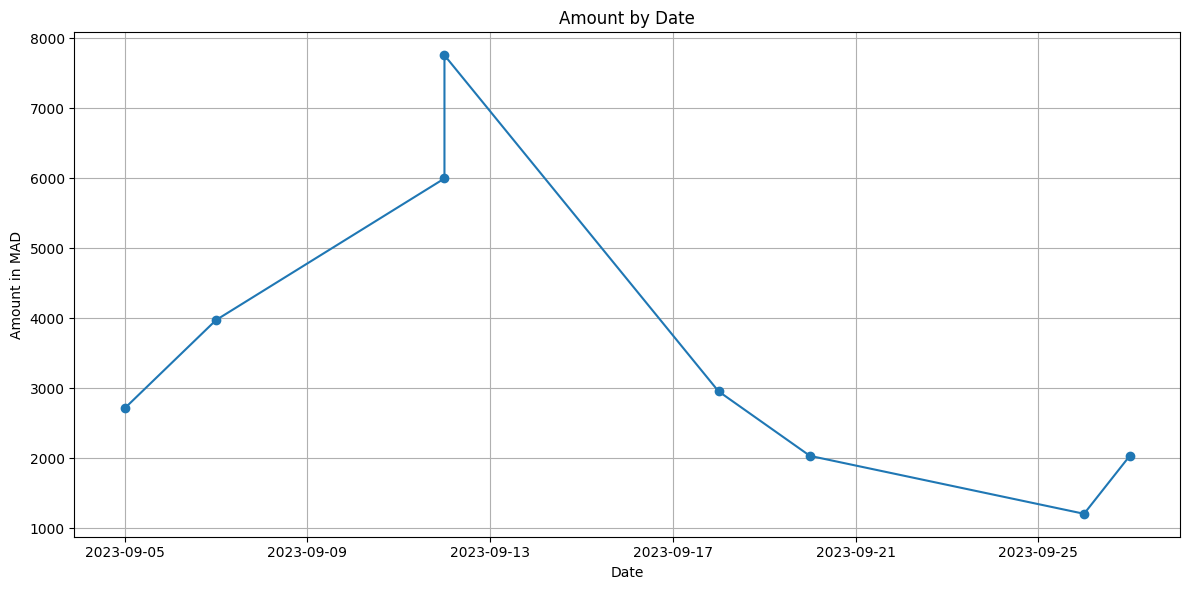

In [26]:
# Libraries for PDF extraction, regex, file listing, tabulation, and plotting
import PyPDF2
import re
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
from datetime import datetime

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

def format_date(date_str):
    return f"{date_str[:2]}-{date_str[2:4]}-{date_str[4:]}"

def extract_info(documentText):
    name_match = re.search(r'M\s+([A-Z\s]+)', documentText)
    extractedName = name_match.group(1).strip() if name_match else None

    date_match = re.search(r'\b(\d{7,8})\b', documentText)
    extractedDate = format_date(date_match.group(1)) if date_match else None

    all_amount_matches = re.findall(r'(\d{1,3}(?:\s\d{3})*,\d{2})', documentText)
    extractedAmount = all_amount_matches[-1].replace(' ', '').replace(',', '.') if all_amount_matches else None

    return extractedName, extractedDate, extractedAmount

# Path to your folder containing PDF files in Google Drive
folder_path = '/content/drive/MyDrive/BANK UC/AC'

# List all files in the folder
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Store results for each file in a list
results = []

# Loop through each file and extract information
for file in files:
    documentText = extract_text_from_pdf(os.path.join(folder_path, file))
    name, date, amount = extract_info(documentText)
    results.append([file, name, date, amount])

# Display results using tabulate
headers = ['File Name', 'Name', 'Date', 'Amount']
print(tabulate(results, headers=headers, tablefmt='grid'))

# Plotting graph of Amount by Date
dates = [datetime.strptime(row[2], '%d-%m-%Y') for row in results]
amounts = [float(row[3]) for row in results]

plt.figure(figsize=(12, 6))
plt.plot_date(dates, amounts, linestyle='solid')
plt.title('Amount by Date')
plt.ylabel('Amount in MAD')
plt.xlabel('Date')
plt.tight_layout()
plt.grid(True)
plt.show()


# **NOW UPDATE CODE to reflect a more generalized name extraction pattern**

In [ ]:
# Libraries for PDF extraction, regex, file listing, and tabulation
import PyPDF2
import re
import os
from tabulate import tabulate

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

def format_date(date_str):
    return f"{date_str[:2]}-{date_str[2:4]}-{date_str[4:]}"

def extract_info(documentText):
    # Updated name extraction pattern
    name_match = re.search(r'M\s+([A-Z\s]+)', documentText)
    extractedName = name_match.group(1).strip() if name_match else None

    date_match = re.search(r'\b(\d{7,8})\b', documentText)
    extractedDate = format_date(date_match.group(1)) if date_match else None

    all_amount_matches = re.findall(r'(\d{1,3}(?:\s\d{3})*,\d{2})', documentText)
    extractedAmount = all_amount_matches[-1].replace(' ', '').replace(',', '.') if all_amount_matches else None

    return extractedName, extractedDate, extractedAmount

# Path to your folder containing PDF files in Google Drive
folder_path = '/content/drive/MyDrive/ACC'

# List all files in the folder
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Store results for each file in a list
results = []

# Loop through each file and extract information
for file in files:
    documentText = extract_text_from_pdf(os.path.join(folder_path, file))
    name, date, amount = extract_info(documentText)
    results.append([file, name, date, amount])

# Display results using tabulate
headers = ['File Name', 'Name', 'Date', 'Amount']
print(tabulate(results, headers=headers, tablefmt='grid'))


+-------------+----------------------+------------+----------+
| File Name   | Name                 | Date       |   Amount |
+=============+======================+============+==========+
| AC 1.pdf    | RYAN GOLDSTEIN       | 27-09-2023 |  2037    |
+-------------+----------------------+------------+----------+
| AC 2.pdf    | ATTYA AND YASSK      | 26-09-2023 |  1209.47 |
+-------------+----------------------+------------+----------+
| AC 3.pdf    | ABDELKARIM EL FAOUZI | 20-09-2023 |  2037    |
+-------------+----------------------+------------+----------+


# **PERFECT YOUR THE MAN**